In [2]:
install.packages('class')
install.packages('gmodels')
install.packages('scales')

package 'class' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpMldVvn\downloaded_packages


also installing the dependencies 'gtools', 'gdata'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpMldVvn\downloaded_packages
package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpMldVvn\downloaded_packages


In [2]:
library(class)
library(gmodels)
library(scales)

In [3]:
setwd('C:/Users/15U560/Desktop/week10_1')

In [4]:
iris <- read.csv('iris.csv')

In [5]:
set.seed(1)
N = nrow(iris)
tr.idx = sample(1:N, size = N*2/3, replace = FALSE)

In [6]:
?sample

In [7]:
iris.train <- iris[tr.idx, -5]
iris.test <- iris[-tr.idx, -5]
trainLabels <- iris[tr.idx, 5]
testLabels <- iris[-tr.idx, 5]

In [8]:
train <- iris[tr.idx,]
test <- iris[-tr.idx,]

In [9]:
md1 <- knn(train=iris.train, test=iris.test, cl=trainLabels, k=5)
md1
# md1에는 test 데이터(50개)들을 예측한 결과가 저장되어 있음

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] versicolor versicolor virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] versicolor virginica  virginica  virginica  virginica  virginica 
[49] virginica  virginica 
Levels: setosa versicolor virginica

In [10]:
CrossTable(x=testLabels, y=md1, prop.chisq=FALSE)
# 정확도 : 49/50 = 98%
# 오분류율 : 1/50 = 2%
help(CrossTable)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  50 

 
             | md1 
  testLabels |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         18 |          0 |          0 |         18 | 
             |      1.000 |      0.000 |      0.000 |      0.360 | 
             |      1.000 |      0.000 |      0.000 |            | 
             |      0.360 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         14 |          0 |         14 | 
             |      0.000 |      1.000 |      0.000 |      0.280 | 
             |      0.000 |      0.933 |      0.000 |            | 
             |      0.000 |      0.280 |      0.000 |            | 
------

In [10]:
# knn에서 최적 k 탐색
accuracy_k <- NULL
# 적합한 k를 찾기위한 
nnum <- nrow(iris.train)/2
for(kk in c(1:nnum))
    {
    set.seed(1234)
    knn_k <- knn(train=iris.train, test=iris.test, cl=trainLabels, k=kk)
    accuracy_k <- c(accuracy_k, sum(knn_k == testLabels)/length(testLabels))
}

In [16]:
accuracy_k

[1] 0.94 0.94 0.96 0.98 0.98 0.98 0.98 1.00 1.00 0.98 0.98 1.00 1.00 0.98 0.96
[16] 0.96 0.96 0.96 0.96 0.96 0.98 0.96 0.96 0.94 0.94 0.94 0.96 0.96 0.94 0.94
[31] 0.94 0.94 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.90 0.90 0.90
[46] 0.90 0.90 0.90 0.90 0.90

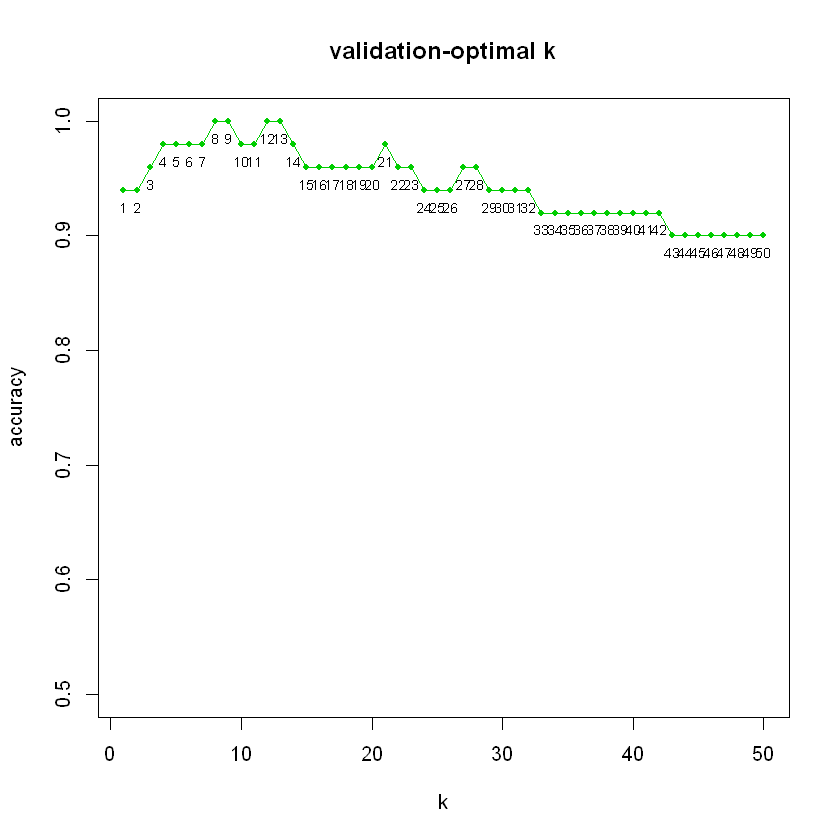

In [13]:
test_k <- data.frame(k=c(1:nnum), accuracy=accuracy_k[c(1:nnum)])
plot(formula=accuracy~k, data=test_k, type='o', ylim=c(0.5, 1), pch=20, col=3, main='validation-optimal k')
with(test_k, text(accuracy ~k, labels= k, pos=1, cex = 0.7))

In [14]:
?text

In [15]:
# minimum k for the highest accuracy
min(test_k[test_k$accuracy %in% max(accuracy_k), 'k'])

[1] 8

In [16]:
# k =7 knn
md1 = knn(train=iris.train, test = iris.test, cl= trainLabels, k=7)
CrossTable(x=testLabels, y=md1, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  50 

 
             | md1 
  testLabels |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         18 |          0 |          0 |         18 | 
             |      1.000 |      0.000 |      0.000 |      0.360 | 
             |      1.000 |      0.000 |      0.000 |            | 
             |      0.360 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         14 |          0 |         14 | 
             |      0.000 |      1.000 |      0.000 |      0.280 | 
             |      0.000 |      0.933 |      0.000 |            | 
             |      0.000 |      0.280 |      0.000 |            | 
------